In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset

In [2]:
rrhh_df = pd.read_csv('./data/rrhh.csv', sep = ',')

In [3]:
rrhh_df.rename(columns = { 'sales' : 'department'}, inplace = True)

In [4]:
rrhh_df.shape

(14999, 10)

In [5]:
rrhh_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [6]:
# La clase objetivo con la que más se podría equivocar el modelo por la necesidad de clasificar
print('satisfaction_level:', rrhh_df['satisfaction_level'].value_counts().count())
print('last_evaluation:', rrhh_df['last_evaluation'].value_counts().count())
print('number_project:', rrhh_df['number_project'].value_counts().count())
print('average_montly_hours:', rrhh_df['average_montly_hours'].value_counts().count())
print('time_spend_company:', rrhh_df['time_spend_company'].value_counts().count())
print('Work accident:', rrhh_df['Work_accident'].value_counts().count())
print('Left: ', rrhh_df['left'].value_counts().count())
print('Promotion last five years: ', rrhh_df['promotion_last_5years'].value_counts().count())
print('Department:', rrhh_df['department'].value_counts().count())
print('Salary:', rrhh_df['salary'].value_counts().count())

satisfaction_level: 92
last_evaluation: 65
number_project: 6
average_montly_hours: 215
time_spend_company: 8
Work accident: 2
Left:  2
Promotion last five years:  2
Department: 10
Salary: 3


In [7]:
rrhh_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Splitting train and test datasets

In [8]:
X = rrhh_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

In [9]:
Y = rrhh_df['salary']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

In [11]:
pd.Series(Y_train).value_counts(normalize = True)

low       0.487761
medium    0.429755
high      0.082484
Name: salary, dtype: float64

In [12]:
pd.Series(Y_test).value_counts(normalize = True)

low       0.487778
medium    0.429778
high      0.082444
Name: salary, dtype: float64

### Training the model

In [13]:
model = DecisionTreeClassifier(max_depth = 7)

In [14]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7)

[Text(964.875, 1019.25, 'X[6] <= 0.5\ngini = 0.571\nsamples = 10499\nvalue = [866, 5121, 4512]'),
 Text(641.0357142857143, 883.35, 'X[7] <= 0.5\ngini = 0.586\nsamples = 8008\nvalue = [812, 3596, 3600]'),
 Text(381.9642857142857, 747.45, 'X[4] <= 5.5\ngini = 0.583\nsamples = 7795\nvalue = [760, 3557, 3478]'),
 Text(212.57142857142858, 611.55, 'X[0] <= 0.975\ngini = 0.58\nsamples = 7095\nvalue = [662, 3307, 3126]'),
 Text(106.28571428571429, 475.65, 'X[0] <= 0.965\ngini = 0.581\nsamples = 6779\nvalue = [640, 3174, 2965]'),
 Text(53.142857142857146, 339.75, 'X[3] <= 266.5\ngini = 0.581\nsamples = 6676\nvalue = [630, 3115, 2931]'),
 Text(26.571428571428573, 203.85000000000002, 'X[3] <= 226.5\ngini = 0.58\nsamples = 6221\nvalue = [579, 2887, 2755]'),
 Text(13.285714285714286, 67.95000000000005, 'gini = 0.579\nsamples = 4518\nvalue = [416, 2138, 1964]'),
 Text(39.85714285714286, 67.95000000000005, 'gini = 0.582\nsamples = 1703\nvalue = [163, 749, 791]'),
 Text(79.71428571428572, 203.85000000

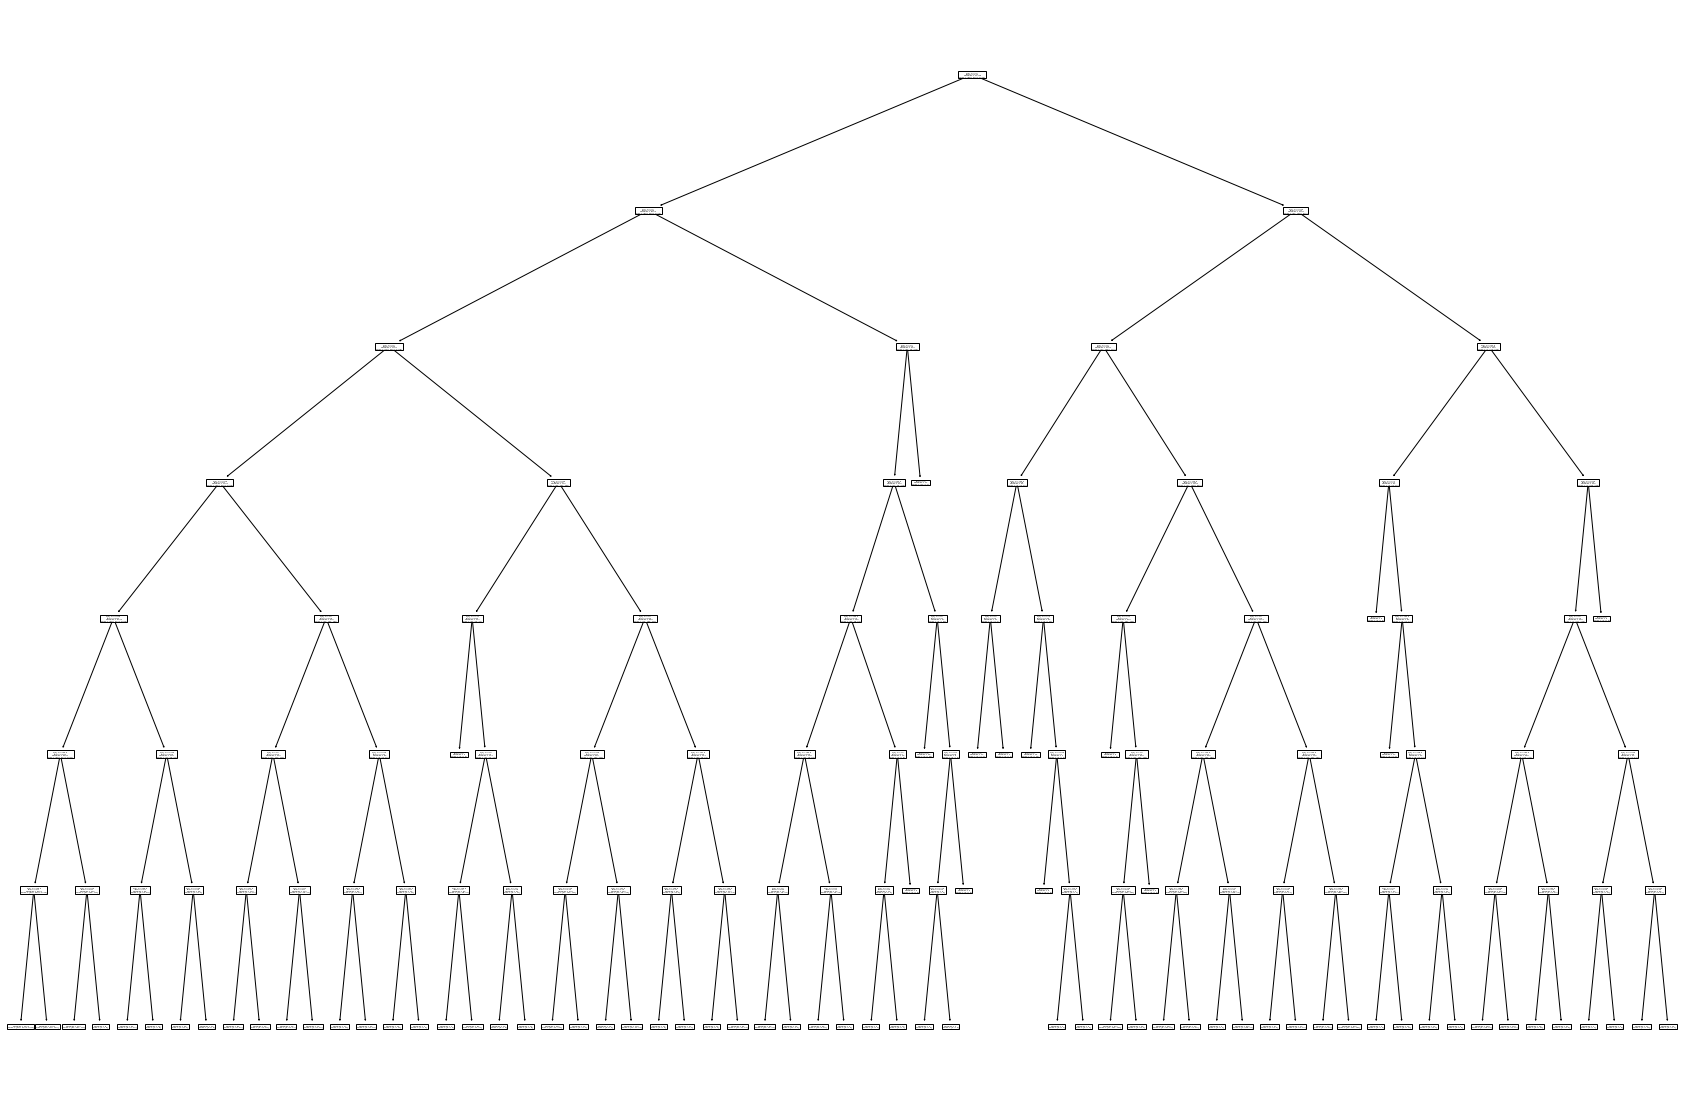

In [15]:
plt.figure(figsize = (30, 20))
plot_tree(model)

### Evaluating the model

In [16]:
predictions = model.predict(X_test)

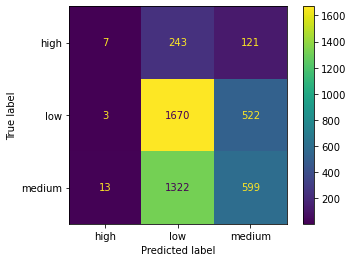

In [17]:
cm = confusion_matrix(Y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
# NO FUNCIONÓ
ConfusionMatrixDisplay.from_predictions(Y_test, predictions)

### Showing class distributions among classes

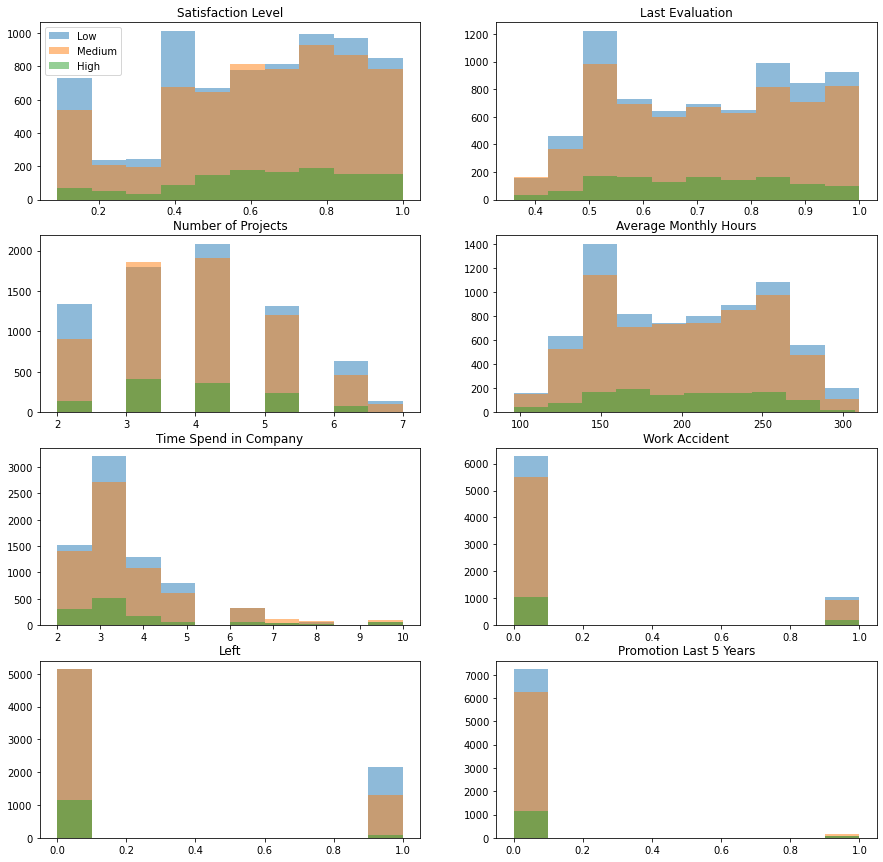

In [19]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 15))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7 = axes.flatten()

ax0.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'satisfaction_level' ], label = 'Low', alpha = 0.5)
ax0.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'satisfaction_level' ], label = 'Medium', alpha = 0.5)
ax0.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'satisfaction_level' ], label = 'High', alpha = 0.5)
ax0.set_title('Satisfaction Level')
ax0.legend()

ax1.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'last_evaluation' ], label = 'Low', alpha = 0.5)
ax1.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'last_evaluation' ], label = 'Medium', alpha = 0.5)
ax1.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'last_evaluation' ], label = 'High', alpha = 0.5)
ax1.set_title('Last Evaluation')

ax2.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'number_project' ], label = 'Low', alpha = 0.5)
ax2.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'number_project' ], label = 'Medium', alpha = 0.5)
ax2.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'number_project' ], label = 'High', alpha = 0.5)
ax2.set_title('Number of Projects')

ax3.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'average_montly_hours' ], label = 'Low', alpha = 0.5)
ax3.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'average_montly_hours' ], label = 'Medium', alpha = 0.5)
ax3.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'average_montly_hours' ], label = 'High', alpha = 0.5)
ax3.set_title('Average Monthly Hours')

ax4.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'time_spend_company' ], label = 'Low', alpha = 0.5)
ax4.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'time_spend_company' ], label = 'Medium', alpha = 0.5)
ax4.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'time_spend_company' ], label = 'High', alpha = 0.5)
ax4.set_title('Time Spend in Company')

ax5.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'Work_accident' ], label = 'Low', alpha = 0.5)
ax5.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'Work_accident' ], label = 'Medium', alpha = 0.5)
ax5.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'Work_accident' ], label = 'High', alpha = 0.5)
ax5.set_title('Work Accident')

ax6.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'left' ], label = 'Low', alpha = 0.5)
ax6.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'left' ], label = 'Medium', alpha = 0.5)
ax6.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'left' ], label = 'High', alpha = 0.5)
ax6.set_title('Left')

ax7.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'promotion_last_5years' ], label = 'Low', alpha = 0.5)
ax7.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'promotion_last_5years' ], label = 'Medium', alpha = 0.5)
ax7.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'promotion_last_5years' ], label = 'High', alpha = 0.5)
ax7.set_title('Promotion Last 5 Years')

plt.show()